# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [6]:
data_df = pd.read_csv("https://raw.githubusercontent.com/Nadila-agustF/Proyek-Machine-Learning-Pemula/refs/heads/main/bank_for_clasification.csv")
data_df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,Cluster
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,5112.21,0
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,13758.91,1
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1122.35,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,8569.06,0
4,13.45,Credit,Atlanta,Online,26.0,Student,198.0,7429.40,1


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Location             2512 non-null   object 
 3   Channel              2512 non-null   object 
 4   CustomerAge          2512 non-null   float64
 5   CustomerOccupation   2512 non-null   object 
 6   TransactionDuration  2512 non-null   float64
 7   AccountBalance       2512 non-null   float64
 8   Cluster              2512 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 176.8+ KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

Note: Melakukan encoding terlebih dahulu pada variabel kategori dan normalisasi variable numerik untuk memudahkan dalam pembagian data

In [22]:
# Encoding data
label_encoder = LabelEncoder()
categori = ["TransactionType", "Location", "Channel", "CustomerOccupation"]

for column in categori:
  data_df[column] = label_encoder.fit_transform(data_df[column])

data_df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,Cluster
0,0.015144,1,36,0,0.838710,0,0.244828,0.336832,0
1,0.411703,1,15,0,0.806452,0,0.451724,0.918055,1
2,0.138004,1,23,2,0.016129,3,0.158621,0.068637,0
3,0.201745,1,33,2,0.129032,3,0.051724,0.569198,0
4,0.014443,0,1,2,0.129032,3,0.648276,0.492591,1


In [23]:
# Normalisasi data
scaler = MinMaxScaler()
numerik = ["TransactionAmount", "CustomerAge", "TransactionDuration", "AccountBalance"]

data_df[numerik] = scaler.fit_transform(data_df[numerik])
# memisahkan fitur dan target
X = data_df.drop(columns=['Cluster'])
y = data_df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2009, 8), y_train=(2009,)
Test set shape: X_test=(503, 8), y_test=(503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [26]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
Lrs = LogisticRegression().fit(X_train, y_train)
xgb = XGBClassifier().fit(X_train, y_train)

print("Model training selesai")

Model training selesai


## Algoritma yang digunakan
- K-Nearest Neighbors (KNN): Algoritma ini bekerja dengan mengklasifikasikan data berdasarkan kesamaan (jarak) dengan data tetangga terdekat
- Decision Tree: Algoritma ini membangun pohon keputusan berdasarkan fitur dataset untuk memprediksi target dan membagi data berdasarkan fitur yang memberikan informasi paling tinggi  
- Random Forest: Teknik ensembel yang terdiri dari banyak model pohon keputusan yang digabungkan. Hasil akhir diambil dari suara mayoritas dari pohon-pohon tersebut
- Support Vector Machine (SVM): Merupakan algoritma klasifikasi yang mencari garis pemisah terbaik (hyperplane) antar kelas.
- Naive Bayes: Algoritma probabilistik yang menggunakan Teorema Bayes untuk klasifikasi.
- Logistik Regresion: Model statistik yang memprediksi probabilitas kelas dengan menggunakan fungsi logistik.
- XGBoost: Algoritma boosting yang membangun model secara bertahap dari kesalahan model sebelumnya


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [27]:
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()

  results = {
      'Confusion Matrix': cm,
      'True Positive (TP)': tp,
      'False Positive (FP)': fp,
      'False Negative (FN)': fn,
      'True Negative (TN)': tn,
      'Accuracy': accuracy_score(y_test, y_pred),
      'Precision': precision_score(y_test, y_pred),
      'Recall': recall_score(y_test, y_pred),
      'F1-Score': f1_score(y_test, y_pred)
  }
  return results

results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test),
    "Logistic Regression (LR)": evaluate_model(Lrs, X_test, y_test),
    "XGBoost": evaluate_model(xgb, X_test, y_test)
  }

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precission', 'Recall', 'F1-Score'])

  # Isi dataframe dengan hasil
rows = []
for model_name, metrics in results.items():
  rows.append({
      'Model': model_name,
      'Accuracy': metrics['Accuracy'],
      'Precision': metrics['Precision'],
      'Recall': metrics['Recall'],
      'F1-Score': metrics['F1-Score']
    })


#Konversi daftar kamus ke dataframe
summary_df = pd.DataFrame(rows)

print(summary_df)

                          Model  Accuracy  Precision  Recall  F1-Score
0     K-Nearest Neighbors (KNN)  1.000000   1.000000     1.0  1.000000
1            Decision Tree (DT)  1.000000   1.000000     1.0  1.000000
2            Random Forest (RF)  1.000000   1.000000     1.0  1.000000
3  Support Vector Machine (SVM)  1.000000   1.000000     1.0  1.000000
4              Naive Bayes (NB)  0.996024   0.992565     1.0  0.996269
5      Logistic Regression (LR)  1.000000   1.000000     1.0  1.000000
6                       XGBoost  1.000000   1.000000     1.0  1.000000


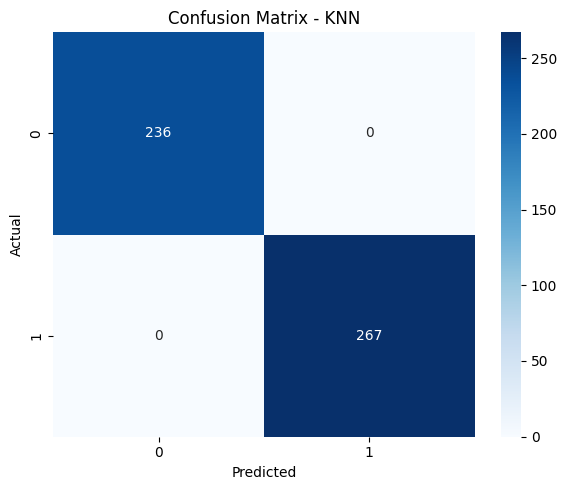

KNN - Accuracy: 1.0000, F1-Score: 1.0000



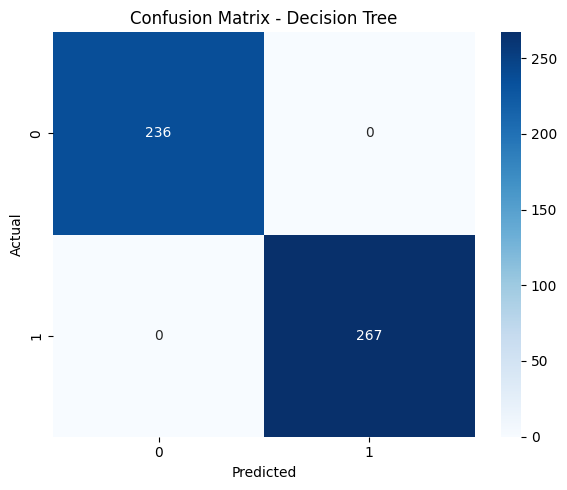

Decision Tree - Accuracy: 1.0000, F1-Score: 1.0000



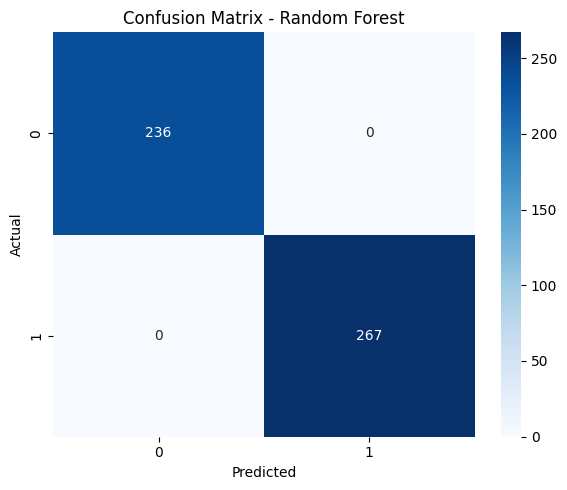

Random Forest - Accuracy: 1.0000, F1-Score: 1.0000



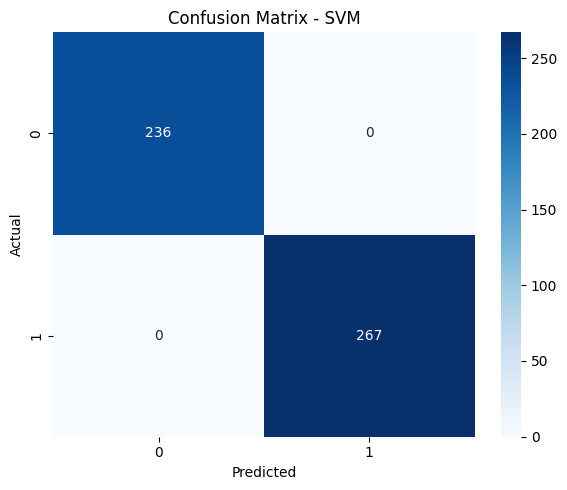

SVM - Accuracy: 1.0000, F1-Score: 1.0000



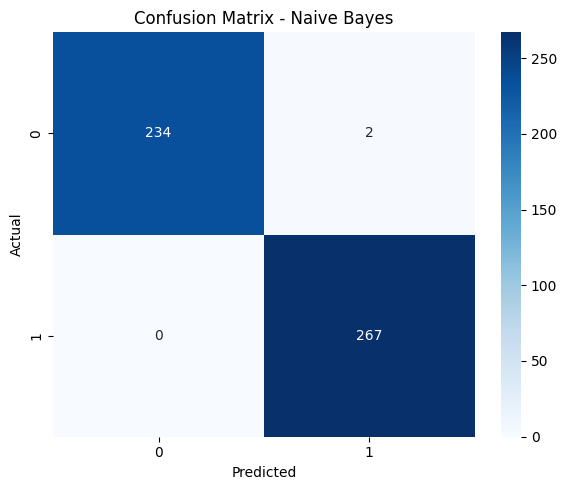

Naive Bayes - Accuracy: 0.9960, F1-Score: 0.9960



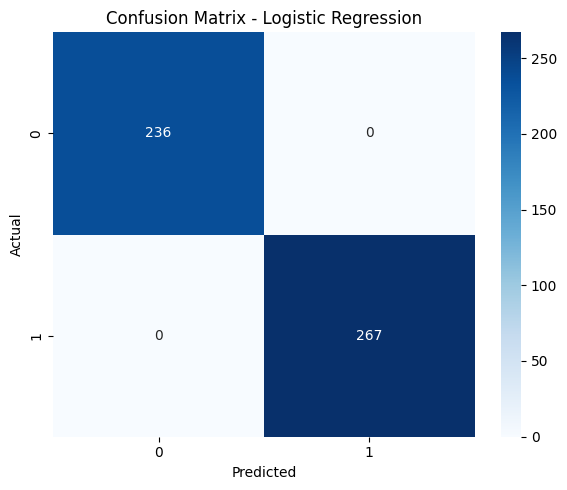

Logistic Regression - Accuracy: 1.0000, F1-Score: 1.0000



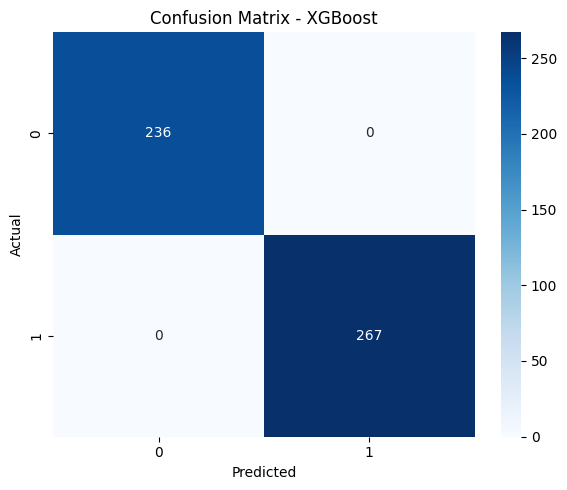

XGBoost - Accuracy: 1.0000, F1-Score: 1.0000



In [28]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    labels = np.unique(np.concatenate((y_test, y_pred)))
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.tight_layout()
    plt.show()

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {acc:.4f}, F1-Score: {f1:.4f}\n")

# Menampilkan confusion matrix & metrik untuk semua model
plot_confusion_matrix(knn, X_test, y_test, "KNN")
plot_confusion_matrix(dt, X_test, y_test, "Decision Tree")
plot_confusion_matrix(rf, X_test, y_test, "Random Forest")
plot_confusion_matrix(svm, X_test, y_test, "SVM")
plot_confusion_matrix(nb, X_test, y_test, "Naive Bayes")
plot_confusion_matrix(Lrs, X_test, y_test, "Logistic Regression")
plot_confusion_matrix(xgb, X_test, y_test, "XGBoost")

Hasil evaluasi akurasi algoritma
Berdasarkan hasil evaluasi, semua algoritma menunjukan hasil akurasi yang sempurna.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

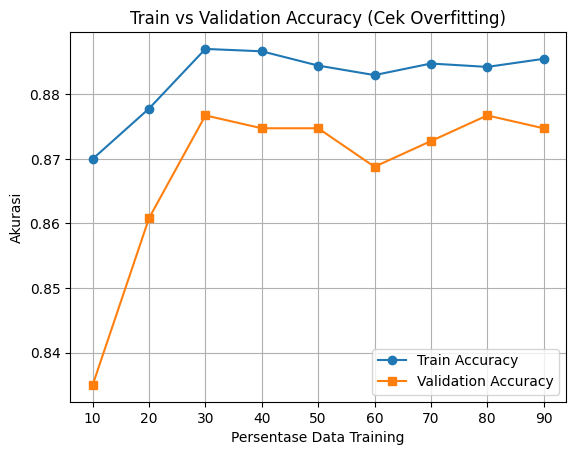

In [46]:
# Memeriksa overfitting
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

train_accuracies = []
val_accuracies = []

percentages = range(10, 100, 10)

for i in percentages:
    X_train_sub = X_train[:int(len(X_train)*i/100)]
    y_train_sub = y_train[:int(len(y_train)*i/100)]

    model.fit(X_train_sub, y_train_sub)
    train_acc = model.score(X_train_sub, y_train_sub)
    val_acc = model.score(X_test, y_test)

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Visualisasi
plt.plot(percentages, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(percentages, val_accuracies, marker='s', label='Validation Accuracy')
plt.xlabel('Persentase Data Training')
plt.ylabel('Akurasi')
plt.title('Train vs Validation Accuracy (Cek Overfitting)')
plt.legend()
plt.grid(True)
plt.show()

**Identifikasi kelemahan model**

Hasil evaluasi menunjukan

    Model                        || Accuracy  Precision  Recall  F1-Score
    K-Nearest Neighbors (KNN)    || 1.000000   1.000000     1.0  1.000000   
    Decision Tree (DT)           || 1.000000   1.000000     1.0  1.000000
    Random Forest (RF)           || 1.000000   1.000000     1.0  1.000000
    Support Vector Machine (SVM) || 1.000000   1.000000     1.0  1.000000
    Naive Bayes (NB)             || 0.996024   0.992565     1.0  0.996269
    Logistic Regression (LR)     || 1.000000   1.000000     1.0  1.000000
    XGBoost                      || 1.000000   1.000000     1.0  1.000000

Performa model menunjukkan hasil yang sempurna, dengan akurasi 0.99 - 1.0 pada data pelatihan dan pengujian. Hal ini dapat mengindikasikan adanya overfitting, di mana model mungkin telah terlalu "menghafal" data training dan tidak dapat digeneralisasi dengan baik ke data yang lebih luas. Namun, setelah memeriksa indikasi overfitting dengan grafik learning curve, hasilnya tidak menunjukkan adanya overfitting yang signifikan. Selisih antara akurasi pada data training dan data testing sangat kecil, yang menunjukkan bahwa model memiliki kemampuan generalisasi yang baik.

**Rekomendasi:**

Meskipun semua model menunjukkan performa yang sangat baik, dengan akurasi yang hampir sempurna, sangat disarankan untuk melakukan pengujian ulang menggunakan data yang baru dan lebih besar. Hal ini penting untuk memastikan bahwa model tidak mengalami overfitting serta benar-benar mampu beradaptasi dengan kondisi data yang lebih luas. Dengan demikian, model diharapkan tetap stabil dan efektif saat diterapkan pada data di luar data pelatihan awal.